**Import packages**


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as ols
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

**Load the dataset**

In [3]:
df_original = pd.read_csv("/content/StudentsPerformance (1).csv")


**Output the first 10 rows**

In [4]:
df_original.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


**Data exploration, data cleaning, and model preparation**

In [5]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df_original.duplicated().count()


np.int64(1000)

In [7]:
df_original.shape


(1000, 8)

In [8]:
df_original.isna().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [9]:
df_original['gender'].value_counts()


,count
gender,
female,518
male,482


In [10]:
df_original.duplicated().value_counts()

,count
False,1000


In [11]:
df_original.dtypes

,0
gender,object
race/ethnicity,object
parental level of education,object
lunch,object
test preparation course,object
math score,int64
reading score,int64
writing score,int64


In [12]:
df_subset =df_original.dropna(axis=0)

In [13]:
df_subset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [14]:
df_subset.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [24]:
df_subset['average'] = df_subset[['math score','reading score','writing score']].mean(axis = 1).round(2)

**Create the training and testing data**

In [25]:
df_subset['average']

,average
0,72.67
1,82.33
2,92.67
3,49.33
4,76.33
...,...
995,94.00
996,57.33
997,65.00
998,74.33


In [26]:
df_subset['result'] = df_subset['average'].apply(lambda x: 1 if x > 40 else 0)

In [27]:
df_subset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,result,average
0,female,group B,bachelor's degree,standard,none,72,72,74,1,72.67
1,female,group C,some college,standard,completed,69,90,88,1,82.33
2,female,group B,master's degree,standard,none,90,95,93,1,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,49.33
4,male,group C,some college,standard,none,76,78,75,1,76.33
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,1,94.00
996,male,group C,high school,free/reduced,none,62,55,55,1,57.33
997,female,group C,high school,free/reduced,completed,59,71,65,1,65.00
998,female,group D,some college,standard,completed,68,78,77,1,74.33


In [28]:
df_subset['result'].value_counts()

,count
result,
1,968
0,32


****

**Create the training and testing data**

 Put 70% of the data into a training set and the remaining 30% into a testing set. Create an X and
 y DataFrame with only the necessary variables.

In [29]:
X=df_subset[['average']]
y=df_subset[['result']]

In [30]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=30,random_state=42)

In [31]:
clf=LogisticRegression().fit(X_train,y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Obtain parameter estimates**

In [32]:
clf.coef_

array([[1.88356335]])

In [33]:
 clf.intercept_

array([-76.25731536])

**Create a plot of your model**

<Axes: xlabel='average', ylabel='result'>

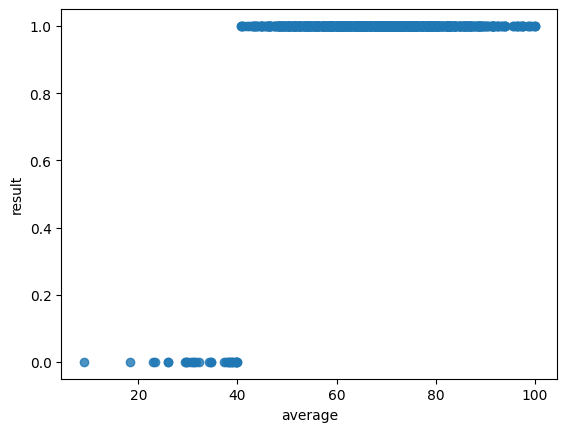

In [39]:
 import seaborn as sns

#sns.regplot(x="Inflight entertainment",y="satisfaction",␣data = df_original,logistic=True)
sns.regplot(x="average", y="result",data = df_subset, logistic=True,)

In [37]:
import warnings
warnings.filterwarnings('ignore')

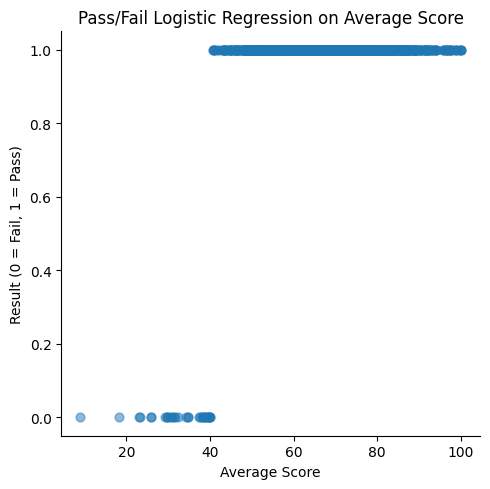

In [40]:
# Logistic regression
sns.lmplot(
    x="average",
    y="result",
    data=df_subset,
    logistic=True,
    ci=None,
    scatter_kws={'s': 40, 'alpha': 0.5},
    line_kws={'color': 'blue'}
)

plt.xlabel("Average Score")
plt.ylabel("Result (0 = Fail, 1 = Pass)")
plt.title("Pass/Fail Logistic Regression on Average Score")
plt.tight_layout()
plt.show()


 The graph seems to indicate that the higher the average value, the higher the
 chances of getting passed in exam, though this is currently not the most informative plot.

**Results and evaluation**

In [43]:
 #predictions.
 y_pred=clf.predict(X_test)

In [44]:
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [46]:
# Using predict_proba to output a probability.
clf.predict_proba(X_test)

array([[0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [6.66133815e-16, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [2.01855613e-07, 9.99999798e-01],
       [4.68958311e-06, 9.99995310e-01],
       [1.00000000e+00, 1.41390150e-12],
       [0.00000000e+00, 1.00000000e+00],
       [2.44249065e-15, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [1.08416126e-07, 9.99999892e-01],
       [3.82972818e-07, 9.99999617e-01],
       [3.11215498e-11, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [5.82300176e-08, 9.99999942e-01],
       [0.00000000e+00, 1.00000000e+00],
       [1.33235747e-03, 9.98667643e-01],
       [0.000000

**Using the predict_proba function on X_test will produce the probability that each observation
 is a 0 or 1.**

---



In [48]:
# Use predict to output 0's and 1's.
clf.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

where 0’s are Fail and 1’s are Pass.

**Analyze the results**

In [49]:
 print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
 print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
 print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
 print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
F1 Score: 1.000000


**Produce a confusion matrix**

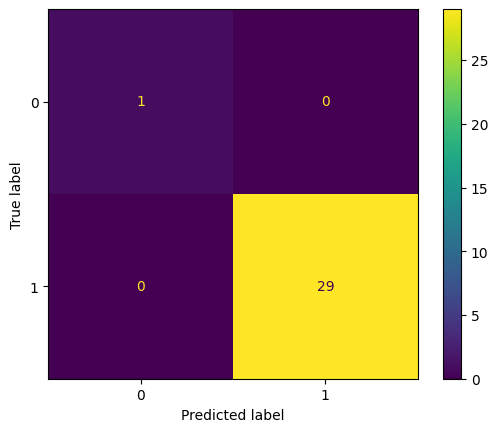

In [52]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels =clf.classes_)
disp.plot()

The Confussion matrix shows that it correctly predicted 29 out of 30 "Pass" cases. There are no false positives or false negatives, and only one true negative (correctly predicted "Fail"). This suggests that:
*   The dataset is highly imbalanced, with very few "Fail" (0) cases.
*   The model might be biased towards predicting Pass (1) due to the imbalance.



**Considerations**

Understanding Confusion Matrix: I learned how to interpret a confusion matrix and what each cell means in terms of true/false positives and negatives.

Class Imbalance Matters: I realized how a model can appear to perform well on accuracy but still be biased if the dataset is imbalanced.

Logistic Regression Behavior: The lab showed how logistic regression handles binary classification and visualizes the decision boundary using a sigmoid (S-curve).

Importance of Evaluation Metrics: It’s not just about accuracy — precision, recall, and F1-score give a much deeper understanding of model performance.

